In [1]:
from qiskit import *
from qiskit import Aer
backend = Aer.get_backend('unitary_simulator')
import numpy as np
np.set_printoptions(linewidth=200, precision=3, suppress=True)

{'001010100010': 1000}


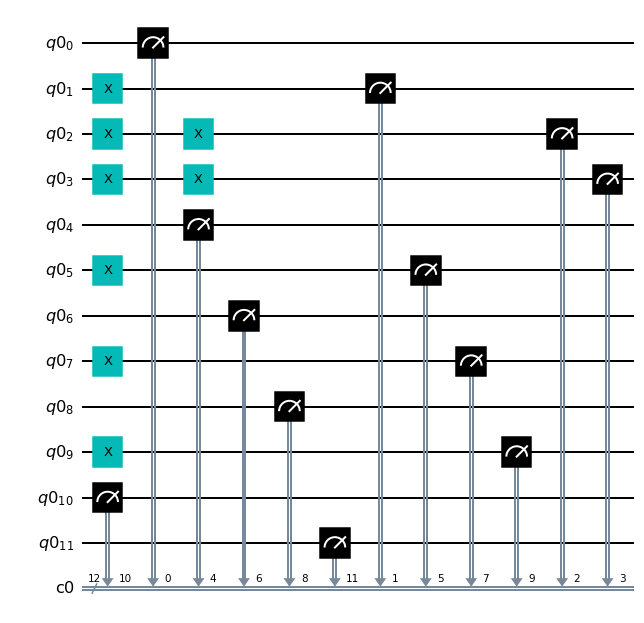

In [2]:
N = 3855 #dimension of the QuDit
first_state = 44 #initial State
second_state = 674 #final State

qudit_dimension = [N]
qd_size = int(np.ceil(np.log2(qudit_dimension[0]))) #later not needed

qd = QuantumRegister(qd_size)
cd = ClassicalRegister(qd_size) #for mesures, not needed, like measures in the middle of the computation
qdc = QuantumCircuit(qd,cd)

#check if 2**qd_size < first_state and second_state

def qudit_swap(qdcircuit, qd_size, first_state, second_state):
    bin_first_state, bin_second_state = [], []
    
    for k in range(qd_size):
        bin_first_state.append((first_state >> k) & 1)
        bin_second_state.append((second_state >> k) & 1)
        
    #initialises the initial state of the QuDit (not needed later)
    for i in range(qd_size): 
        if(bin_first_state[i] == 1):
            qdcircuit.x(qd[i])
            
    for i in range(qd_size): #The "swap part". I don't use ancillary Qubits BUT i can use some if needed
        if(bin_first_state[i] != bin_second_state[i]):
            qdcircuit.x(qd[i])
            
    qdcircuit.measure(qd, cd) #optional, just to see if it works
    
    return qdcircuit

qdc = qudit_swap(qdc, qd_size, first_state, second_state)

simulator = Aer.get_backend('qasm_simulator') #simulation part
job = execute(qdc, simulator, shots=1000)
results = job.result()
mesures = results.get_counts()
print(mesures)

qdc.draw(output = "mpl")